# Machine Learning A/B Testing

## Imports

In [125]:
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [126]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [127]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from csv_helper import CsvHelper

## Info

I have already splitted my data and trained on each model through the modules in the scripts folder. Here I am going to show the results only. If you want to see the code for splitting, training and evaluation of the models head to the scripts folder.

## Data reading

### Input features

In [128]:
# sample test input features data
helper = CsvHelper()
test_features = helper.read_csv("../features/test_features.csv")
test_features.head(10)

,experiment,hour,date_of_week,device_make,browser
0,1,6,0,3,0
1,0,1,6,9,3
2,0,5,6,3,0
3,0,15,5,19,2
4,0,15,4,3,0
5,0,13,3,17,2
6,0,21,2,3,0
7,0,15,4,14,2
8,1,5,4,27,1
9,1,2,6,1,1


### Target Features

In [129]:
# sample test label data
test_labels = helper.read_csv("../features/test_labels.csv")
test_labels.head(10)

,aware
0,1
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,1
9,0


## Utility Function

In [130]:
def plot_confusion_matrix(actual, y_preds):
  plt.figure(figsize=(12, 8))
  cf_matrix = metrics.confusion_matrix(actual, y_preds)
  sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  plt.title('Confusion matrix', fontsize=15, fontweight='bold')
  plt.ylabel('Actual', fontsize=14)
  plt.xlabel('Predicted', fontsize=14)
  plt.show()

## Logistic Regression

In [131]:
# load the logistic model from the models folder
model = pickle.load(open("../models/logistic_model.pickle", "rb"))
model

LogisticRegression(random_state=42, solver='liblinear')

### Feature Importance

In [132]:
feat_imp = pd.DataFrame({'Feature Importance': model.coef_[0]})
feat_imp['Feature'] = feature_columns
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
experiment,0.117850
date_of_week,0.009411
hour,0.003817
device_make,-0.000131
browser,-0.004021


### Confusion Matrix

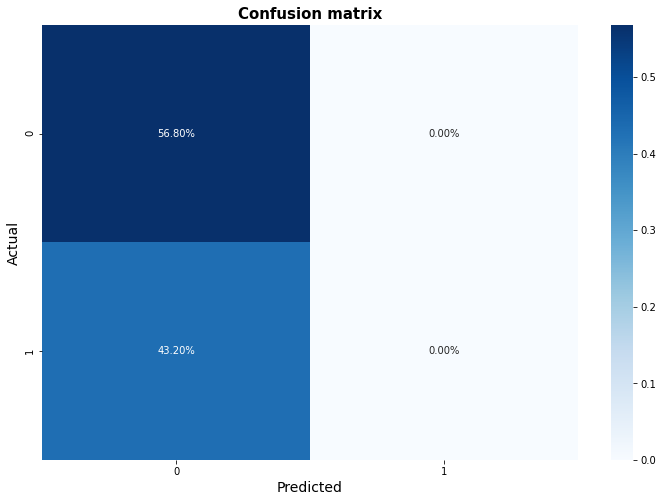

In [133]:
preds = model.predict(test_features)
plot_confusion_matrix(test_labels, preds)

## Decision Tree Classifier


In [134]:
# load the decision tree model from the models folder
model = pickle.load(open("../models/decision_tree_model.pickle", "rb"))
model

DecisionTreeClassifier(max_depth=5, random_state=42)

### Feature Importance

In [135]:
feat_imp = pd.DataFrame({'Feature Importance': model.feature_importances_})
feat_imp['Feature'] = feature_columns
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
device_make,0.416268
hour,0.317088
date_of_week,0.205708
experiment,0.060936
browser,0.000000


### Confusion Matrix

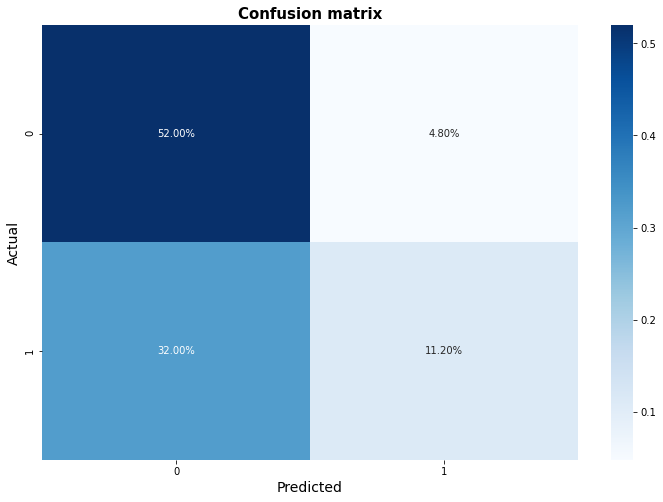

In [136]:
preds = model.predict(test_features)
plot_confusion_matrix(test_labels, preds)

## XGBoost

In [137]:
# load the XGBoost model from the models folder
model = pickle.load(open("../models/xgboost_model.pickle", "rb"))
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, solver='newton-cg',
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Feature Importance

In [138]:
feat_imp = pd.DataFrame({'Feature Importance': model.feature_importances_})
feat_imp['Feature'] = feature_columns
feat_imp = feat_imp.set_index('Feature')
feat_imp = feat_imp.sort_values(by=['Feature Importance'], ascending=False)
feat_imp

,Feature Importance
Feature,
date_of_week,0.254159
experiment,0.199052
hour,0.192449
browser,0.186528
device_make,0.167813


### Confusion Matrix

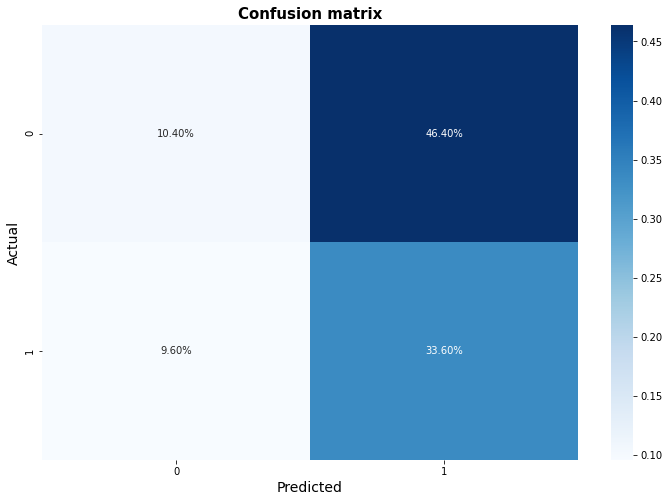

In [139]:
preds = model.predict(test_features)
plot_confusion_matrix(test_labels, preds)